In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import lars_path

import afinn
import re

%matplotlib inline
sns.set()

## Inspect the data

Notes: clean data after removing videos of the channels I didn't manage to scrape infomation about.


In [2]:
with open('../scrape_scripts/video_channel_df_8162.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, https://www.youtube.com/user/oceanworshipper to https://www.youtube.com/user/yogayak
Data columns (total 22 columns):
channel_URL_page        8162 non-null object
video_order_num         8162 non-null float64
duration                8162 non-null float64
views_video             8162 non-null float64
video_age_min           8162 non-null float64
channel_URL_info        8162 non-null object
video_URL_ext           8162 non-null object
views_DUPL              8162 non-null float64
video_desc              8162 non-null object
video_published_date    8162 non-null datetime64[ns]
likes                   8162 non-null float64
dislikes                8162 non-null float64
video_desc_length       8162 non-null float64
delivery_method         8162 non-null object
channel_name            8162 non-null object
total_views_channel     8162 non-null float64
channel_created_date    8162 non-null datetime64[ns]
subscriber_count        8162 non-

In [4]:
df.head(3)


,channel_URL_page,video_order_num,duration,views_video,video_age_min,channel_URL_info,video_URL_ext,views_DUPL,video_desc,video_published_date,...,video_desc_length,delivery_method,channel_name,total_views_channel,channel_created_date,subscriber_count,n_featured_channels,n_promo_links,channel_desc_length,channel_desc
channel_URL,,,,,,,,,,,,,,,,,,,,,
https://www.youtube.com/user/oceanworshipper,https://www.youtube.com/user/oceanworshipper,1.0,349.0,932.0,2880.0,https://www.youtube.com/user/oceanworshipper,3GYdWbDE_0g,102.0,"Align Your Yoga, Align Your Life is a deep div...",2020-04-07,...,1008.0,Published,Donate to EcoKarma,237924.0,2008-02-26,3070.0,0.0,2.0,288.0,Blissology is about making the world a better ...
https://www.youtube.com/user/oceanworshipper,https://www.youtube.com/user/oceanworshipper,15.0,60.0,20461.0,15768000.0,https://www.youtube.com/user/oceanworshipper,nCKcW9wbMlM,2046.0,Advanced Alignment and Adjustments is part of ...,2018-07-05,...,381.0,Published,Donate to EcoKarma,237924.0,2008-02-26,3070.0,0.0,2.0,288.0,Blissology is about making the world a better ...
https://www.youtube.com/user/oceanworshipper,https://www.youtube.com/user/oceanworshipper,17.0,159.0,1602.0,31536000.0,https://www.youtube.com/user/oceanworshipper,KMGAlkw-MbA,160.0,Nature is the ultimate spiritual portal. When ...,2018-01-06,...,1120.0,Published,Donate to EcoKarma,237924.0,2008-02-26,3070.0,0.0,2.0,288.0,Blissology is about making the world a better ...


In [5]:
df.columns

Index(['channel_URL_page', 'video_order_num', 'duration', 'views_video',
       'video_age_min', 'channel_URL_info', 'video_URL_ext', 'views_DUPL',
       'video_desc', 'video_published_date', 'likes', 'dislikes',
       'video_desc_length', 'delivery_method', 'channel_name',
       'total_views_channel', 'channel_created_date', 'subscriber_count',
       'n_featured_channels', 'n_promo_links', 'channel_desc_length',
       'channel_desc'],
      dtype='object')

In [6]:
df.shape

(8162, 22)

In [7]:
df.describe()

,video_order_num,duration,views_video,video_age_min,views_DUPL,likes,dislikes,video_desc_length,total_views_channel,subscriber_count,n_featured_channels,n_promo_links,channel_desc_length
count,8162.000000,8162.000000,8.162000e+03,8.162000e+03,8.162000e+03,8162.000000,8162.000000,8162.000000,8.162000e+03,8.162000e+03,8162.000000,8162.000000,8162.000000
mean,13.304215,1033.716736,3.211180e+05,1.721729e+07,3.019288e+04,308.861186,14.096177,751.520951,9.512927e+06,6.133633e+04,1.123622,4.544964,432.257780
std,8.360356,2668.994682,5.522613e+06,2.625999e+07,5.492424e+05,3503.642629,264.907098,871.918550,5.342722e+07,3.396354e+05,2.471062,4.268182,353.594772
min,1.000000,2.000000,1.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,1.820000e+02,0.000000e+00,0.000000,0.000000,0.000000
25%,6.000000,120.000000,1.935250e+03,4.320000e+04,1.760000e+02,4.000000,0.000000,153.000000,1.257220e+05,1.150000e+03,0.000000,0.000000,77.000000
50%,12.000000,398.000000,8.871000e+03,3.024000e+05,8.270000e+02,18.000000,0.000000,463.000000,4.041590e+05,4.040000e+03,0.000000,4.000000,353.000000
75%,20.000000,1140.000000,3.704550e+04,3.153600e+07,3.348250e+03,76.750000,2.000000,988.750000,2.542881e+06,2.770000e+04,1.000000,8.000000,789.000000
max,30.000000,43200.000000,2.748813e+08,4.336200e+08,2.750022e+07,216457.000000,13039.000000,4982.000000,7.463786e+08,6.870000e+06,10.000000,19.000000,1000.000000


## Preprocess Features 

Transform dates to days for interpretability

In [8]:
scrape_date=pd.to_datetime('20200409', format='%Y%m%d')
df['channel_age_days'] = (scrape_date - df['channel_created_date'])/ pd.offsets.Day(1)
df['channel_age_days'] = round(df['channel_age_days'])
df['video_age_days'] = (scrape_date - df['video_published_date'])/ pd.offsets.Day(1)
df['video_age_days'] = round(df['video_age_days'])

#for clarity
df.rename(columns = {'duration':'duration_sec', 'video_URL_ext':'video_id'}, inplace=True)

Categorical variable 'delivery method' to dummy variables.

In [9]:
df = pd.get_dummies(df, columns = ['delivery_method'], drop_first=True)

Sentiment Score for Descriptions

Note: the purpose here is to get more numeric predictors using scraped data.

In [10]:
re.sub("[^A-Za-z ]+", '', df['channel_desc'][0]).lower()

'blissology is about making the world a better place by bringing more awe joy and bliss into the world celebrating the interconnection of our minds bodies and hearts everywhere and asking what do we have to offer nature and community and what does nature and community have to offer us'

In [11]:
af = afinn.Afinn()


def get_sentiment_score(desc):
    desc = re.sub("[^A-Za-z ]+", '', desc)
    sentiment_scores = af.score(desc.lower())
    return sentiment_scores


get_sentiment_score(df['channel_desc'][0])

11.0

In [12]:
df['sentiment_score_channel_desc'] = df['channel_desc'].apply(get_sentiment_score)

In [13]:
df['sentiment_score_video_desc'] = df['video_desc'].apply(get_sentiment_score)

Final selection of preprocessed features

In [14]:
df = df.reset_index()

In [15]:
df.head(3)

,channel_URL,channel_URL_page,video_order_num,duration_sec,views_video,video_age_min,channel_URL_info,video_id,views_DUPL,video_desc,...,n_featured_channels,n_promo_links,channel_desc_length,channel_desc,channel_age_days,video_age_days,delivery_method_Published,delivery_method_Streamed live,sentiment_score_channel_desc,sentiment_score_video_desc
0,https://www.youtube.com/user/oceanworshipper,https://www.youtube.com/user/oceanworshipper,1.0,349.0,932.0,2880.0,https://www.youtube.com/user/oceanworshipper,3GYdWbDE_0g,102.0,"Align Your Yoga, Align Your Life is a deep div...",...,0.0,2.0,288.0,Blissology is about making the world a better ...,4426.0,2.0,1,0,11.0,15.0
1,https://www.youtube.com/user/oceanworshipper,https://www.youtube.com/user/oceanworshipper,15.0,60.0,20461.0,15768000.0,https://www.youtube.com/user/oceanworshipper,nCKcW9wbMlM,2046.0,Advanced Alignment and Adjustments is part of ...,...,0.0,2.0,288.0,Blissology is about making the world a better ...,4426.0,644.0,1,0,11.0,5.0
2,https://www.youtube.com/user/oceanworshipper,https://www.youtube.com/user/oceanworshipper,17.0,159.0,1602.0,31536000.0,https://www.youtube.com/user/oceanworshipper,KMGAlkw-MbA,160.0,Nature is the ultimate spiritual portal. When ...,...,0.0,2.0,288.0,Blissology is about making the world a better ...,4426.0,824.0,1,0,11.0,34.0


In [16]:
df.columns

Index(['channel_URL', 'channel_URL_page', 'video_order_num', 'duration_sec',
       'views_video', 'video_age_min', 'channel_URL_info', 'video_id',
       'views_DUPL', 'video_desc', 'video_published_date', 'likes', 'dislikes',
       'video_desc_length', 'channel_name', 'total_views_channel',
       'channel_created_date', 'subscriber_count', 'n_featured_channels',
       'n_promo_links', 'channel_desc_length', 'channel_desc',
       'channel_age_days', 'video_age_days', 'delivery_method_Published',
       'delivery_method_Streamed live', 'sentiment_score_channel_desc',
       'sentiment_score_video_desc'],
      dtype='object')

In [17]:
df = df[['video_id', 'views_video', 'video_order_num', 'duration_sec', 'video_age_min', 'likes', 'dislikes',
       'video_desc_length', 'subscriber_count', 'total_views_channel', 'n_featured_channels',
       'n_promo_links', 'channel_desc_length', 'channel_age_days','video_age_days', 'delivery_method_Published',
       'delivery_method_Streamed live', 'sentiment_score_channel_desc', 'sentiment_score_video_desc', 
       'channel_URL', 'channel_name',]]

In [18]:
df.set_index('video_id', inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, 3GYdWbDE_0g to 9WbXvW2_XEM
Data columns (total 20 columns):
views_video                      8162 non-null float64
video_order_num                  8162 non-null float64
duration_sec                     8162 non-null float64
video_age_min                    8162 non-null float64
likes                            8162 non-null float64
dislikes                         8162 non-null float64
video_desc_length                8162 non-null float64
subscriber_count                 8162 non-null float64
total_views_channel              8162 non-null float64
n_featured_channels              8162 non-null float64
n_promo_links                    8162 non-null float64
channel_desc_length              8162 non-null float64
channel_age_days                 8162 non-null float64
video_age_days                   8162 non-null float64
delivery_method_Published        8162 non-null uint8
delivery_method_Streamed live    8162 non-null uint8
senti

Note: this dataset has identifiers just in case at the end for exploratipon purposes.

In [20]:
round(df.describe())

,views_video,video_order_num,duration_sec,video_age_min,likes,dislikes,video_desc_length,subscriber_count,total_views_channel,n_featured_channels,n_promo_links,channel_desc_length,channel_age_days,video_age_days,delivery_method_Published,delivery_method_Streamed live,sentiment_score_channel_desc,sentiment_score_video_desc
count,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0,8162.0
mean,321118.0,13.0,1034.0,17217288.0,309.0,14.0,752.0,61336.0,9512927.0,1.0,5.0,432.0,2198.0,522.0,1.0,0.0,6.0,6.0
std,5522613.0,8.0,2669.0,26259989.0,3504.0,265.0,872.0,339635.0,53427220.0,2.0,4.0,354.0,1259.0,620.0,0.0,0.0,8.0,11.0
min,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,182.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,-9.0,-46.0
25%,1935.0,6.0,120.0,43200.0,4.0,0.0,153.0,1150.0,125722.0,0.0,0.0,77.0,1183.0,41.0,1.0,0.0,0.0,0.0
50%,8871.0,12.0,398.0,302400.0,18.0,0.0,463.0,4040.0,404159.0,0.0,4.0,353.0,2053.0,235.0,1.0,0.0,4.0,3.0
75%,37046.0,20.0,1140.0,31536000.0,77.0,2.0,989.0,27700.0,2542881.0,1.0,8.0,789.0,3018.0,897.0,1.0,0.0,10.0,9.0
max,274881305.0,30.0,43200.0,433620000.0,216457.0,13039.0,4982.0,6870000.0,746378637.0,10.0,19.0,1000.0,5297.0,3857.0,1.0,1.0,41.0,162.0


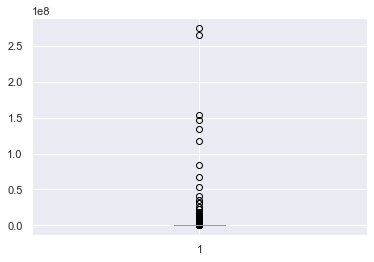

In [155]:
plt.boxplot(df['views_video']);

In [153]:
df['views_video']

video_id
3GYdWbDE_0g       932.0
nCKcW9wbMlM     20461.0
KMGAlkw-MbA      1602.0
HHudryLLmbk      2312.0
AdoqTzZwljk      8392.0
                 ...   
kYVXSQaF1n0    136991.0
h6BlCAs6LgU     65901.0
N4SYOEexnxc    150321.0
VRnv9_qZW8c     61804.0
9WbXvW2_XEM     52322.0
Name: views_video, Length: 8162, dtype: float64

In [31]:
#outlier, but legit scrape
df[df['total_views_channel'] == 746378637.0]

,views_video,video_order_num,duration_sec,video_age_min,likes,dislikes,video_desc_length,subscriber_count,total_views_channel,n_featured_channels,n_promo_links,channel_desc_length,channel_age_days,video_age_days,delivery_method_Published,delivery_method_Streamed live,sentiment_score_channel_desc,sentiment_score_video_desc,channel_URL,channel_name
video_id,,,,,,,,,,,,,,,,,,,,
ix0bwgcjwq0,3766142.0,3.0,838.0,0.0,12134.0,92.0,2792.0,4980000.0,746378637.0,10.0,11.0,253.0,3953.0,18.0,1,0,8.0,21.0,https://www.youtube.com/user/blogilates,Text me!
CaQO5Fd4PEA,2949333.0,5.0,831.0,0.0,9981.0,56.0,2666.0,4980000.0,746378637.0,10.0,11.0,253.0,3953.0,25.0,1,0,8.0,12.0,https://www.youtube.com/user/blogilates,Text me!
mO7jBtyl9XE,4112961.0,6.0,743.0,43200.0,14445.0,80.0,2546.0,4980000.0,746378637.0,10.0,11.0,253.0,3953.0,32.0,1,0,8.0,11.0,https://www.youtube.com/user/blogilates,Text me!
LpJKq9VTTb4,5672461.0,7.0,900.0,43200.0,16131.0,98.0,2700.0,4980000.0,746378637.0,10.0,11.0,253.0,3953.0,39.0,1,0,8.0,24.0,https://www.youtube.com/user/blogilates,Text me!
4uRIozcsebQ,2889021.0,2.0,775.0,0.0,13285.0,60.0,2459.0,4980000.0,746378637.0,10.0,11.0,253.0,3953.0,11.0,1,0,8.0,11.0,https://www.youtube.com/user/blogilates,Text me!
_8vGQR0zxDM,1922504.0,1.0,842.0,5760.0,7552.0,43.0,2788.0,4980000.0,746378637.0,10.0,11.0,253.0,3953.0,4.0,1,0,8.0,25.0,https://www.youtube.com/user/blogilates,Text me!
xEoCXW09-pk,4466321.0,10.0,900.0,43200.0,13035.0,69.0,2325.0,4980000.0,746378637.0,10.0,11.0,253.0,3953.0,53.0,1,0,8.0,17.0,https://www.youtube.com/user/blogilates,Text me!
BTa6crp6L9g,5732922.0,13.0,900.0,86400.0,12963.0,103.0,2269.0,4980000.0,746378637.0,10.0,11.0,253.0,3953.0,67.0,1,0,8.0,21.0,https://www.youtube.com/user/blogilates,Text me!
nejA_F4D2ps,4267412.0,15.0,900.0,86400.0,10990.0,66.0,2590.0,4980000.0,746378637.0,10.0,11.0,253.0,3953.0,80.0,1,0,8.0,28.0,https://www.youtube.com/user/blogilates,Text me!


In [32]:
df.drop(['video_age_min'], axis=1, inplace=True)

In [33]:
with open('video_channel_df_8162_fin.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)

## EDA

In [34]:
#'views_video' is a candidate dependent variable
df_num = df.loc[:,'views_video':'sentiment_score_video_desc']

In [36]:
df_num.head()

,views_video,video_order_num,duration_sec,likes,dislikes,video_desc_length,subscriber_count,total_views_channel,n_featured_channels,n_promo_links,channel_desc_length,channel_age_days,video_age_days,delivery_method_Published,delivery_method_Streamed live,sentiment_score_channel_desc,sentiment_score_video_desc
video_id,,,,,,,,,,,,,,,,,
3GYdWbDE_0g,932.0,1.0,349.0,10.0,0.0,1008.0,3070.0,237924.0,0.0,2.0,288.0,4426.0,2.0,1,0,11.0,15.0
nCKcW9wbMlM,20461.0,15.0,60.0,12.0,0.0,381.0,3070.0,237924.0,0.0,2.0,288.0,4426.0,644.0,1,0,11.0,5.0
KMGAlkw-MbA,1602.0,17.0,159.0,5.0,0.0,1120.0,3070.0,237924.0,0.0,2.0,288.0,4426.0,824.0,1,0,11.0,34.0
HHudryLLmbk,2312.0,16.0,60.0,6.0,0.0,1193.0,3070.0,237924.0,0.0,2.0,288.0,4426.0,819.0,1,0,11.0,12.0
AdoqTzZwljk,8392.0,19.0,60.0,8.0,0.0,529.0,3070.0,237924.0,0.0,2.0,288.0,4426.0,906.0,1,0,11.0,8.0


In [37]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, 3GYdWbDE_0g to 9WbXvW2_XEM
Data columns (total 17 columns):
views_video                      8162 non-null float64
video_order_num                  8162 non-null float64
duration_sec                     8162 non-null float64
likes                            8162 non-null float64
dislikes                         8162 non-null float64
video_desc_length                8162 non-null float64
subscriber_count                 8162 non-null float64
total_views_channel              8162 non-null float64
n_featured_channels              8162 non-null float64
n_promo_links                    8162 non-null float64
channel_desc_length              8162 non-null float64
channel_age_days                 8162 non-null float64
video_age_days                   8162 non-null float64
delivery_method_Published        8162 non-null uint8
delivery_method_Streamed live    8162 non-null uint8
sentiment_score_channel_desc     8162 non-null float64
senti

In [38]:
df_num.corr()

,views_video,video_order_num,duration_sec,likes,dislikes,video_desc_length,subscriber_count,total_views_channel,n_featured_channels,n_promo_links,channel_desc_length,channel_age_days,video_age_days,delivery_method_Published,delivery_method_Streamed live,sentiment_score_channel_desc,sentiment_score_video_desc
views_video,1.000000,-0.030365,0.002334,0.927656,0.939958,0.017946,0.072211,0.055031,-0.002342,-0.017031,-0.011901,-0.004327,0.060375,0.011493,-0.012345,0.002933,0.005394
video_order_num,-0.030365,1.000000,-0.043545,-0.024141,-0.031674,-0.037076,-0.039792,-0.018801,-0.025374,0.008588,0.010783,0.043003,0.222682,0.023856,-0.012415,-0.004757,-0.052559
duration_sec,0.002334,-0.043545,1.000000,0.006697,0.005947,0.213988,0.119600,0.208111,0.010303,-0.012496,0.003427,0.143741,-0.136985,-0.108652,0.118295,0.005773,0.095418
likes,0.927656,-0.024141,0.006697,1.000000,0.844734,0.042501,0.187093,0.143025,0.022296,0.014006,-0.000374,0.004128,0.029735,0.008976,-0.008460,0.007264,0.018560
dislikes,0.939958,-0.031674,0.005947,0.844734,1.000000,0.007756,0.063466,0.051681,-0.001388,-0.014717,-0.015297,-0.001372,0.056027,0.009716,-0.010612,0.003206,0.006232
video_desc_length,0.017946,-0.037076,0.213988,0.042501,0.007756,1.000000,0.171881,0.149598,0.146777,0.290547,0.336141,0.094317,-0.194240,0.022980,-0.066804,0.245733,0.565991
subscriber_count,0.072211,-0.039792,0.119600,0.187093,0.063466,0.171881,1.000000,0.811726,0.216008,0.148013,0.056028,0.155094,-0.050733,-0.020880,0.028537,0.064177,0.126121
total_views_channel,0.055031,-0.018801,0.208111,0.143025,0.051681,0.149598,0.811726,1.000000,0.280833,0.133277,-0.010180,0.226329,0.026923,-0.018443,0.024684,0.043208,0.096148
n_featured_channels,-0.002342,-0.025374,0.010303,0.022296,-0.001388,0.146777,0.216008,0.280833,1.000000,0.272048,0.162583,0.215795,0.084051,0.015421,-0.062321,0.136513,0.083336
n_promo_links,-0.017031,0.008588,-0.012496,0.014006,-0.014717,0.290547,0.148013,0.133277,0.272048,1.000000,0.432161,0.269469,-0.185818,-0.050511,-0.001945,0.271706,0.191832


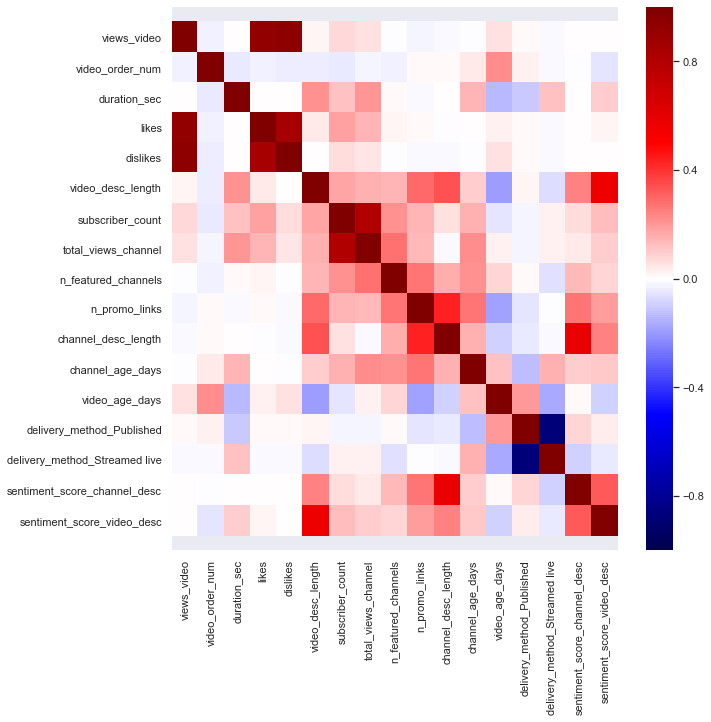

In [39]:
plt.figure(figsize=[10,10])
sns.heatmap(df_num.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)
plt.gca().set_ylim(len(df.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off

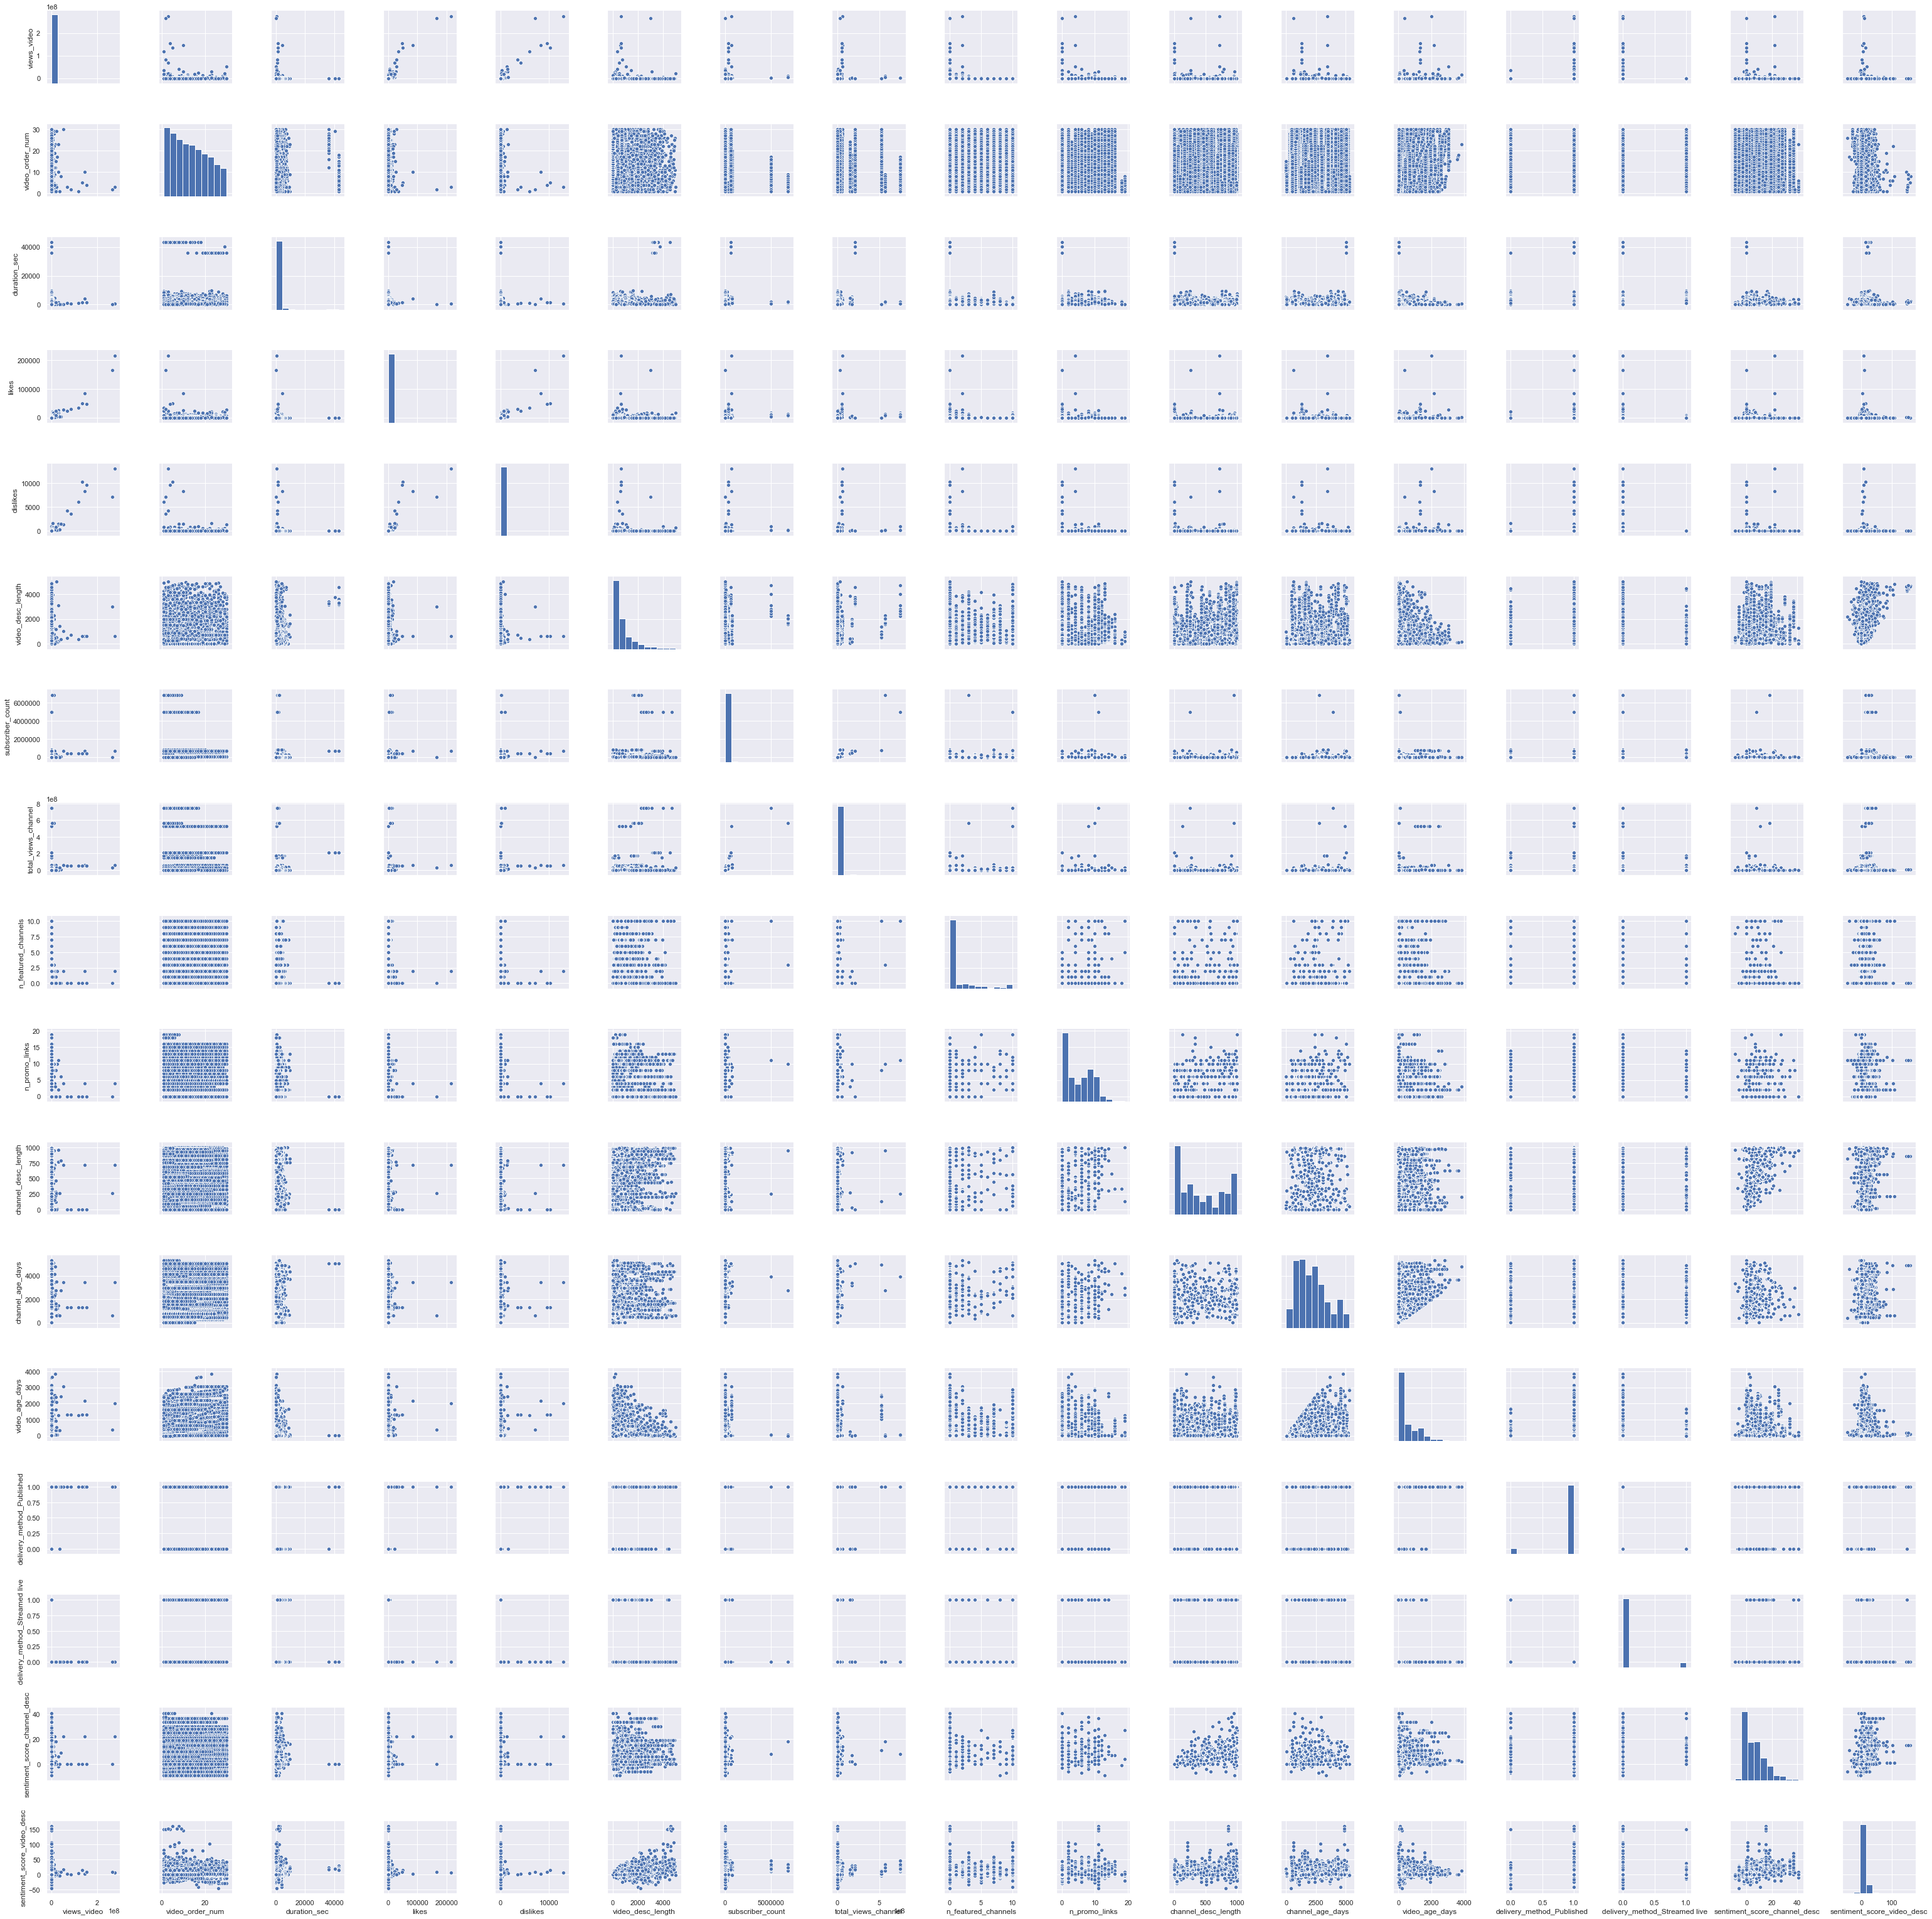

In [40]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df_num);

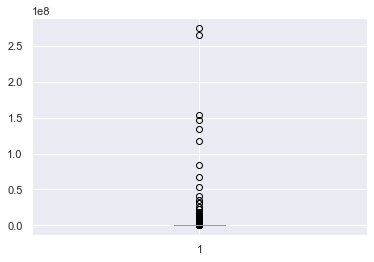

In [41]:
plt.boxplot(df_num['views_video']); #clearly outliers, keep for experiments in modeling

## Baseline Model

In [42]:
X = df_num['likes'].values.reshape(-1, 1)
y = df_num['views_video']

In [43]:
simple_mean = round(df_num['views_video'].mean()) #influenced by outliers
simple_mean

321118

In [49]:
prediction = pd.Series(float(simple_mean)).repeat(8162)
residual = y.subtract(simple_mean)

In [50]:
res = list(residual)
pred = list(prediction)

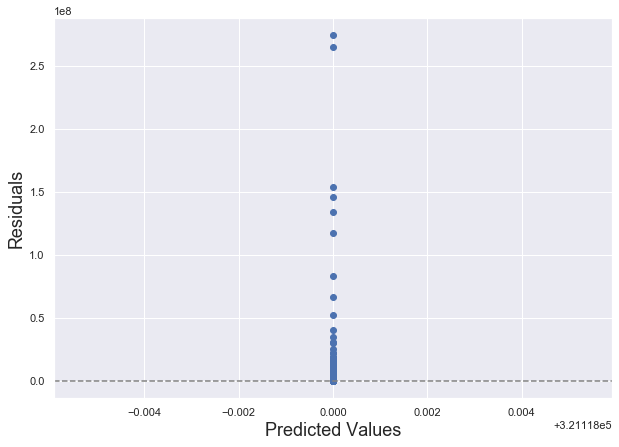

In [51]:
plt.figure(figsize=(10, 7))
plt.scatter(pred, res)

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

## Simple & Multivatiate Linear Regression - All Data

One predictor

In [52]:
lr = LinearRegression()
X = df_num['likes'].values.reshape(-1, 1)
y = df_num['views_video']
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lr.score(X, y)

0.8605453458431187

Full model

In [54]:
lr_full = LinearRegression()
X = df_num.loc[:, 'video_order_num':'sentiment_score_video_desc']
y = df_num['views_video']
lr_full.fit(X, y)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lr_full.score(X, y)

0.9488612006918189

In [56]:
lm_full = lr_full.fit(X, y)
prediction = lm_full.predict(X)
residual = y - prediction

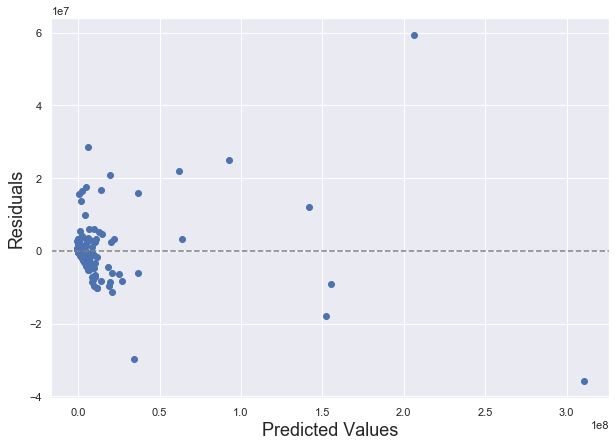

In [57]:
plt.figure(figsize=(10, 7))
plt.scatter(prediction, residual) 

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

...and with statsmodels:

In [63]:
model = sm.OLS(y,sm.add_constant(X))

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            views_video   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     9445.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:10:02   Log-Likelihood:            -1.2616e+05
No. Observations:                8162   AIC:                         2.523e+05
Df Residuals:                    8145   BIC:                         2.525e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2.867e+04    1.1e+05      0.262      0.794   -1.86e+05    2.43e+05
video_order_num               -4748.3962   1709.181     -2.778      0.005   -8098.827   -1397.965
duration_sec                      4.6119      5.598      0.824      0.410      -6.361      15.585
likes                           775.8166      7.638    101.567      0.000     760.843     790.790
dislikes                       1.097e+04     99.535    110.231      0.000    1.08e+04    1.12e+04
video_desc_length                48.9478     20.996      2.331      0.020       7.790      90.105
subscriber_count                 -0.8414      0.072    -11.620      0.000      -0.983      -0.700
total_views_channel              -0.0001      0.000     -0.299      0.765      -0.001       0.001
n_featured_channels           -4959.4399   6170.249     -0.804      0.422   -1.71e+04    7135.823
n_promo_links                 -1.066e+04   3928.030     -2.713      0.007   -1.84e+04   -2956.852
channel_desc_length              18.6954     53.513      0.349      0.727     -86.204     123.595
channel_age_days                 11.2530     12.273      0.917      0.359     -12.805      35.311
video_age_days                  138.8983     25.274      5.496      0.000      89.354     188.442
delivery_method_Published     -7.927e+04   1.04e+05     -0.765      0.445   -2.82e+05    1.24e+05
delivery_method_Streamed live -5.134e+04   1.17e+05     -0.437      0.662   -2.81e+05    1.79e+05
sentiment_score_channel_desc   1129.5730   2271.190      0.497      0.619   -3322.539    5581.685
sentiment_score_video_desc    -1538.4068   1543.040     -0.997      0.319   -4563.159    1486.346
==============================================================================
Omnibus:                    15189.806   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        248048211.625
Skew:                          12.972   Prob(JB):                         0.00
Kurtosis:                     856.640   Cond. No.                     7.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

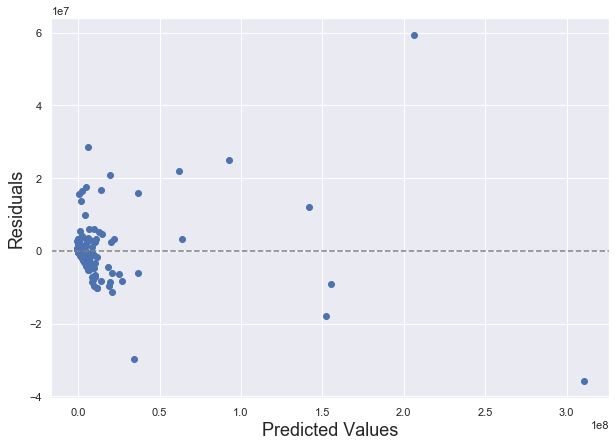

In [65]:
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

## Linear Regression - Train and Test

In [66]:
#Joe's function

def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [67]:
split_and_validate(X, y)


Validation R^2 score was: 0.8346678810589538
Feature coefficient results: 

video_order_num : -6551.37
duration_sec : 4.12
likes : 782.72
dislikes : 10746.25
video_desc_length : 45.72
subscriber_count : -0.85
total_views_channel : 0.00
n_featured_channels : -4673.08
n_promo_links : -9263.75
channel_desc_length : 10.81
channel_age_days : 8.51
video_age_days : 129.25
delivery_method_Published : -76167.54
delivery_method_Streamed live : -49132.59
sentiment_score_channel_desc : 400.22
sentiment_score_video_desc : -910.99


Using polynomial features library

In [68]:
pf = PolynomialFeatures(degree=2)

In [72]:
features = df_num.loc[:, 'video_order_num':'sentiment_score_video_desc'].columns
pf.fit(df[features])

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [77]:
pf.get_feature_names(input_features=features)[:20]

['1',
 'video_order_num',
 'duration_sec',
 'likes',
 'dislikes',
 'video_desc_length',
 'subscriber_count',
 'total_views_channel',
 'n_featured_channels',
 'n_promo_links',
 'channel_desc_length',
 'channel_age_days',
 'video_age_days',
 'delivery_method_Published',
 'delivery_method_Streamed live',
 'sentiment_score_channel_desc',
 'sentiment_score_video_desc',
 'video_order_num^2',
 'video_order_num duration_sec',
 'video_order_num likes']

In [78]:
pf.fit(df[features])
feat_array = pf.transform(df[features])

In [80]:
X = pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

In [81]:
split_and_validate(X, y)


Validation R^2 score was: 0.629266716091927
Feature coefficient results: 

1 : 206.58
video_order_num : 217.91
duration_sec : -142.30
likes : 2828.37
dislikes : 11817.59
video_desc_length : 521.27
subscriber_count : -13.88
total_views_channel : 0.08
n_featured_channels : 94.70
n_promo_links : 75.87
channel_desc_length : -166.34
channel_age_days : -49.61
video_age_days : 995.57
delivery_method_Published : 11.58
delivery_method_Streamed live : -9.11
sentiment_score_channel_desc : -146.25
sentiment_score_video_desc : 90.05
video_order_num^2 : -167.17
video_order_num duration_sec : 0.14
video_order_num likes : 35.03
video_order_num dislikes : -1714.19
video_order_num video_desc_length : -1.26
video_order_num subscriber_count : -0.01
video_order_num total_views_channel : 0.00
video_order_num n_featured_channels : -201.18
video_order_num n_promo_links : 299.93
video_order_num channel_desc_length : 9.12
video_order_num channel_age_days : 0.49
video_order_num video_age_days : 1.97
video_order

# Lasso and Ridge

No scaling 

In [83]:
X = df_num.loc[:, 'video_order_num':'sentiment_score_video_desc']
y = df_num['views_video']

In [84]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [85]:
X_train.columns

Index(['video_order_num', 'duration_sec', 'likes', 'dislikes',
       'video_desc_length', 'subscriber_count', 'total_views_channel',
       'n_featured_channels', 'n_promo_links', 'channel_desc_length',
       'channel_age_days', 'video_age_days', 'delivery_method_Published',
       'delivery_method_Streamed live', 'sentiment_score_channel_desc',
       'sentiment_score_video_desc'],
      dtype='object')

In [86]:
X_train.shape

(4896, 16)

In [87]:
X_val.shape

(1633, 16)

In [88]:
X_test.shape

(1633, 16)

In [89]:
selected_columns = df_num.loc[:, 'video_order_num':'sentiment_score_video_desc'].columns

In [90]:
lasso_model = Lasso(alpha = 1000000)
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=1000000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
list(zip(selected_columns, lasso_model.coef_))

[('video_order_num', -0.0),
 ('duration_sec', 8.790374533815958),
 ('likes', 836.2799366758258),
 ('dislikes', 10038.270375995655),
 ('video_desc_length', 29.011975237009825),
 ('subscriber_count', -1.0024071749052579),
 ('total_views_channel', 1.879854823420687e-05),
 ('n_featured_channels', -0.0),
 ('n_promo_links', -0.0),
 ('channel_desc_length', -30.15515530042744),
 ('channel_age_days', 10.577276212428044),
 ('video_age_days', 132.58858730033097),
 ('delivery_method_Published', -0.0),
 ('delivery_method_Streamed live', 0.0),
 ('sentiment_score_channel_desc', 0.0),
 ('sentiment_score_video_desc', 0.0)]

In [92]:
lr_model_ridge = Ridge(alpha = 1000000)
lr_model_ridge.fit(X_train.loc[:,selected_columns], y_train)

list(zip(selected_columns, lr_model_ridge.coef_))

[('video_order_num', -1338.8738145207403),
 ('duration_sec', 8.702885508383257),
 ('likes', 839.1061550957013),
 ('dislikes', 9991.590789310896),
 ('video_desc_length', 32.37847351655737),
 ('subscriber_count', -1.0044466808687256),
 ('total_views_channel', -4.0730061066531314e-07),
 ('n_featured_channels', -150.37470963014965),
 ('n_promo_links', -643.7819220097169),
 ('channel_desc_length', -38.87704094001862),
 ('channel_age_days', 12.147636688194494),
 ('video_age_days', 139.31946463930103),
 ('delivery_method_Published', -19.868212064269116),
 ('delivery_method_Streamed live', 11.474917810951156),
 ('sentiment_score_channel_desc', 78.89252267549222),
 ('sentiment_score_video_desc', 16.556186979916973)]

In [97]:
test_set_pred_l = lasso_model.predict(X_test.loc[:,selected_columns])

(0, 200000.0)

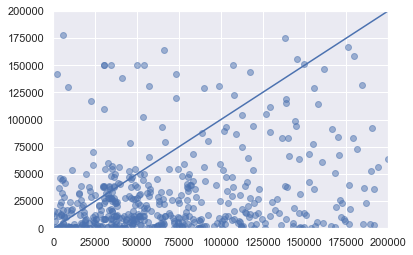

In [98]:
plt.scatter(test_set_pred_l, y_test, alpha=.5)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))
plt.xlim((0, 0.20e6)) 
plt.ylim((0, 0.20e6)) 

In [101]:
r2_score(y_test, test_set_pred_l)

0.8313055407093226

In [ ]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [102]:
mae(y_test, test_set_pred_l)

219281.82761403424

In [103]:
test_set_pred_r = lr_model_ridge.predict(X_test.loc[:,selected_columns])

(0, 200000.0)

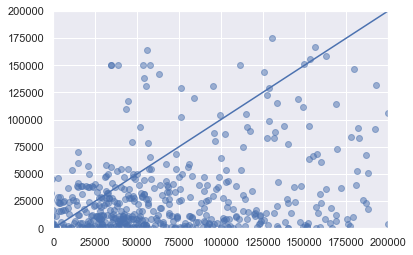

In [104]:
plt.scatter(test_set_pred_r, y_test, alpha=.5)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))
plt.xlim((0, 0.20e6)) 
plt.ylim((0, 0.20e6)) 

In [107]:
r2_score(y_test, test_set_pred_r)

0.8309739478608951

In [108]:
mae(y_test, test_set_pred_r)

221241.01348977658

With scaling

In [109]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

In [110]:
X_tr = std.transform(X_train.values) #numpy.ndarray
X_te = std.transform(X_test.values)

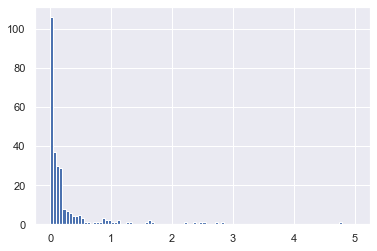

In [111]:
#scaling does not affect distirbition, and therefore does not make it Gaussian
plt.hist(X_tr[:,3], range=(0,5), bins=100);

In [112]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
#coeficients for comparison
list(zip(X_train.columns, lasso_model.coef_))

[('video_order_num', -31308.43569987121),
 ('duration_sec', 9961.563088764888),
 ('likes', 3473322.3855991294),
 ('dislikes', 3034098.0272714384),
 ('video_desc_length', 20234.040199526877),
 ('subscriber_count', -300306.78881765023),
 ('total_views_channel', -0.0),
 ('n_featured_channels', -0.0),
 ('n_promo_links', -30029.13134443964),
 ('channel_desc_length', -0.0),
 ('channel_age_days', 12168.529508195641),
 ('video_age_days', 75335.30871734623),
 ('delivery_method_Published', -4059.7206215818833),
 ('delivery_method_Streamed live', 0.0),
 ('sentiment_score_channel_desc', 0.0),
 ('sentiment_score_video_desc', 0.0)]

In [114]:
#coefficients in original units
lasso_model.coef_/np.std(X_train)

video_order_num                  -3740.905576
duration_sec                         3.693556
likes                              831.955939
dislikes                         10060.198238
video_desc_length                   22.954932
subscriber_count                    -0.944828
total_views_channel                 -0.000000
n_featured_channels                 -0.000000
n_promo_links                    -7015.269559
channel_desc_length                 -0.000000
channel_age_days                     9.577039
video_age_days                     121.587501
delivery_method_Published       -14705.017630
delivery_method_Streamed live        0.000000
sentiment_score_channel_desc         0.000000
sentiment_score_video_desc           0.000000
dtype: float64

In [115]:
ridge_model = Ridge(alpha = 10000)
ridge_model.fit(X_tr,y_train)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
#coeficients for comparison
list(zip(X_train.columns, ridge_model.coef_))

[('video_order_num', -45688.38532167418),
 ('duration_sec', -4989.219175523111),
 ('likes', 1545248.4082875112),
 ('dislikes', 1529768.6598334936),
 ('video_desc_length', 21991.181474929817),
 ('subscriber_count', 23352.927225737174),
 ('total_views_channel', 14215.32488857802),
 ('n_featured_channels', -17096.72470911039),
 ('n_promo_links', -27301.447683979353),
 ('channel_desc_length', -16195.174507657191),
 ('channel_age_days', -12913.818309813032),
 ('video_age_days', 75174.24179713208),
 ('delivery_method_Published', 8164.9386864120215),
 ('delivery_method_Streamed live', -7782.723883789941),
 ('sentiment_score_channel_desc', 34.34179714492332),
 ('sentiment_score_video_desc', 4783.407226699307)]

In [117]:
#coefficients in original units
ridge_model.coef_/np.std(X_train)

video_order_num                  -5459.101727
duration_sec                        -1.849906
likes                              370.129360
dislikes                          5072.273815
video_desc_length                   24.948358
subscriber_count                     0.073473
total_views_channel                  0.000273
n_featured_channels              -6861.463013
n_promo_links                    -6378.040466
channel_desc_length                -45.715740
channel_age_days                   -10.163606
video_age_days                     121.327547
delivery_method_Published        29574.834951
delivery_method_Streamed live   -31862.029136
sentiment_score_channel_desc         4.405345
sentiment_score_video_desc         415.816033
dtype: float64

## Ridge and Lasso: Regularization & Validation

Lasso

In [120]:
alphalist = 10**(np.linspace(0,10,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

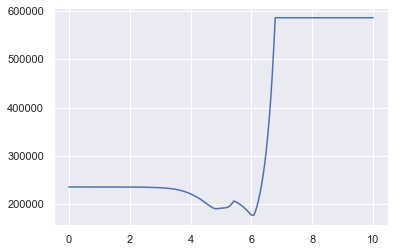

In [121]:
#curve of validation error vs alpha

plt.plot(np.log10(alphalist), err_vec_val);

In [122]:
# min error on the validation set 
np.min(err_vec_val)

176916.82677443884

In [123]:
# alpha --> the lowest error
alphalist[np.argmin(err_vec_val)]

1071891.3192051286

Ridge

In [126]:
alphalist = 10**(np.linspace(0,10,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), 
             ('lasso', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

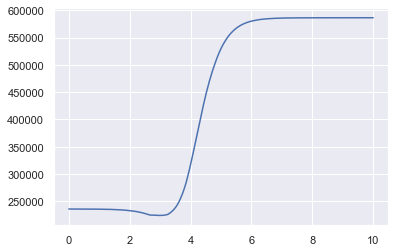

In [127]:
plt.plot(np.log10(alphalist), err_vec_val);

In [128]:
# min error on the validation set 
np.min(err_vec_val)

224092.12794885205

In [129]:
# alpha --> the lowest error
alphalist[np.argmin(err_vec_val)]

922.1978823334332

## Automated Regularization & Cross-validation

Lasso

In [138]:
## Dupl: scaling
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [133]:
alphavec = 10**np.linspace(0,10,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train);

In [134]:
# the best alpha: compare to 62225.708367302315 above
lasso_model.alpha_

1.0

In [135]:
list(zip(X_train.columns, lasso_model.coef_))

[('video_order_num', -44115.41164888115),
 ('duration_sec', 16124.371838244333),
 ('likes', 3484244.120078972),
 ('dislikes', 3034118.73650901),
 ('video_desc_length', 37618.164312069195),
 ('subscriber_count', -317599.32693187543),
 ('total_views_channel', 5455.868451214143),
 ('n_featured_channels', -10702.876508828625),
 ('n_promo_links', -42162.75735238167),
 ('channel_desc_length', -4435.0555773761935),
 ('channel_age_days', 24842.458495536994),
 ('video_age_days', 90246.28101820078),
 ('delivery_method_Published', -32809.49569944116),
 ('delivery_method_Streamed live', -18812.721697736095),
 ('sentiment_score_channel_desc', 6851.740820897574),
 ('sentiment_score_video_desc', -2371.1322228283098)]

In [136]:
test_set_pred = lasso_model.predict(X_te)

In [137]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

228391.14619824223

In [138]:
r2_score(y_test, test_set_pred)

0.8315844244941784

Ridge

In [139]:
alphavec = 10**np.linspace(0,10,200)
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train);

In [140]:
#compare to 1846.4249428955425
ridge_model.alpha_

1.0

In [141]:
list(zip(X_train.columns, ridge_model.coef_))

[('video_order_num', -44126.115361415155),
 ('duration_sec', 16121.66580087023),
 ('likes', 3483506.208444855),
 ('dislikes', 3034111.589432533),
 ('video_desc_length', 37627.830660026855),
 ('subscriber_count', -317301.39244922454),
 ('total_views_channel', 5311.546990754332),
 ('n_featured_channels', -10709.245130648938),
 ('n_promo_links', -42153.535587238664),
 ('channel_desc_length', -4454.874198483896),
 ('channel_age_days', 24823.307134078786),
 ('video_age_days', 90271.52490003544),
 ('delivery_method_Published', -32769.764225076),
 ('delivery_method_Streamed live', -18780.37348886198),
 ('sentiment_score_channel_desc', 6853.86561905516),
 ('sentiment_score_video_desc', -2381.1471472642725)]

In [142]:
test_set_pred = ridge_model.predict(X_te)

In [143]:
mae(y_test, test_set_pred)

228375.14194093598

In [144]:
r2_score(y_test, test_set_pred)

0.831564788158225

## LARS Path: Feature Importance

In [145]:
## Note: lars_path takes numpy matrices, not pandas dataframes
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


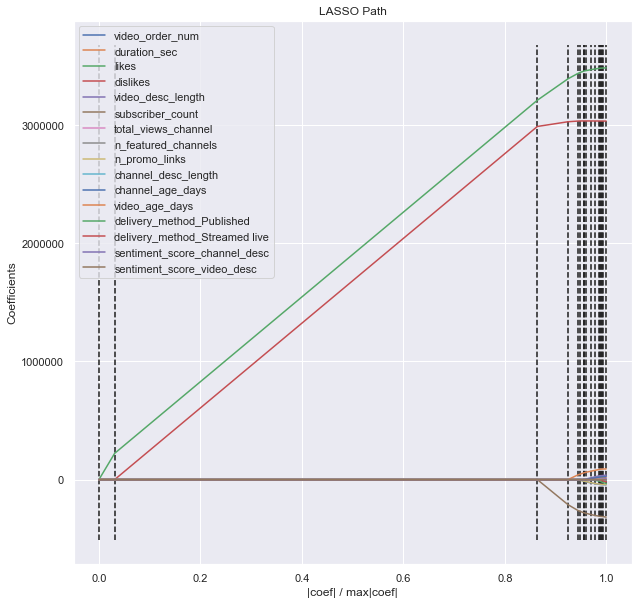

In [146]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()